## Building a powerful Stock Trading Bot with MACD and RSI Strategies

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to calculate the RSI
def calculate_rsi(data, period=14):
    delta = data['Close'].diff() # Calculate the difference in closing prices 
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()   # calculate the average gain
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # calculate the average loss
    rs = gain / loss # Calculate the relative strength
    rsi = 100 - (100/(1+rs)) # calculate the RSI
    return rsi

In [5]:
# Function to calculate the MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()  # Calculate the short term EMA
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean() # Calculate the long term EMA
    macd = short_ema - long_ema # Calculate the MACD line
    signal = macd.ewm(span=signal_window, adjust=False).mean() # Calculate the signal line
    return macd, signal

In [17]:
# Read in the stock data
import yfinance as yf

data = yf.download('AMZN', start='2014-12-16', end='2024-12-12')
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000
2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000
2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000
2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000
2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000
...,...,...,...,...,...,...
2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200
2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100


In [18]:
new_col_names = [col[0] for col in data.columns]
new_col_names

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [19]:
data.columns = new_col_names
data = data.reset_index()
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000
1,2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000
2,2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000
3,2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000
4,2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000
...,...,...,...,...,...,...,...
2509,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200
2510,2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100
2511,2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400
2512,2024-12-10,225.039993,225.039993,229.059998,224.199997,226.089996,31199900


In [21]:
# Calculate the RSI
data['RSI'] = calculate_rsi(data)

# Show the data
data

,Date,Adj Close,Close,High,Low,Open,Volume,RSI
0,2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000,NaN
1,2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000,NaN
2,2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000,NaN
3,2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000,NaN
4,2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000,NaN
...,...,...,...,...,...,...,...,...
2509,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200,59.477540
2510,2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100,76.858771
2511,2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400,76.808086
2512,2024-12-10,225.039993,225.039993,229.059998,224.199997,226.089996,31199900,73.412778


In [22]:
# Calculate the MACD
data['MACD'], data['Signal'] = calculate_macd(data)

# Show the data
data

,Date,Adj Close,Close,High,Low,Open,Volume,RSI,MACD,Signal
0,2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000,NaN,0.000000,0.000000
1,2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000,NaN,0.015236,0.003047
2,2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000,NaN,0.022413,0.006921
3,2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000,NaN,0.036436,0.012824
4,2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000,NaN,0.073492,0.024957
...,...,...,...,...,...,...,...,...,...,...
2509,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200,59.477540,5.197577,4.099027
2510,2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100,76.858771,6.166357,4.512493
2511,2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400,76.808086,6.780114,4.966017
2512,2024-12-10,225.039993,225.039993,229.059998,224.199997,226.089996,31199900,73.412778,7.099951,5.392804


In [28]:
# Function to generate trading signals
def generate_signals(data):
    buy_signals = []
    sell_signals = []
    for i in range(len(data)):
        if data['RSI'][i] < 40 and data['MACD'][i] > data['Signal'][i]: # Buy signal condition
            buy_signals.append(data['Close'][i])
            sell_signals.append(np.nan)
        elif data['RSI'][i] > 60 and data['MACD'][i] < data['Signal'][i]: # Sell signal condition
            buy_signals.append(np.nan)
            sell_signals.append(data['Close'][i])
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    return buy_signals, sell_signals

In [29]:
# Generate the Buy and Sell signals
data['Buy_Signal'], data['Sell_Signal'] = generate_signals(data)

# Show the data
data

,Date,Adj Close,Close,High,Low,Open,Volume,RSI,MACD,Signal,Buy_Signal,Sell_Signal
0,2014-12-16,14.753000,14.753000,15.224500,14.750500,15.217500,130026000,NaN,0.000000,0.000000,NaN,NaN
1,2014-12-17,14.944000,14.944000,14.983500,14.651500,14.818500,88670000,NaN,0.015236,0.003047,NaN,NaN
2,2014-12-18,14.886500,14.886500,15.225000,14.662500,15.200500,154762000,NaN,0.022413,0.006921,NaN,NaN
3,2014-12-19,14.995000,14.995000,15.077000,14.776000,14.845500,174182000,NaN,0.036436,0.012824,NaN,NaN
4,2014-12-22,15.327000,15.327000,15.368000,15.097000,15.097000,80076000,NaN,0.073492,0.024957,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200,59.477540,5.197577,4.099027,NaN,NaN
2510,2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44178100,76.858771,6.166357,4.512493,NaN,NaN
2511,2024-12-09,226.089996,226.089996,230.080002,225.669998,227.210007,46819400,76.808086,6.780114,4.966017,NaN,NaN
2512,2024-12-10,225.039993,225.039993,229.059998,224.199997,226.089996,31199900,73.412778,7.099951,5.392804,NaN,NaN


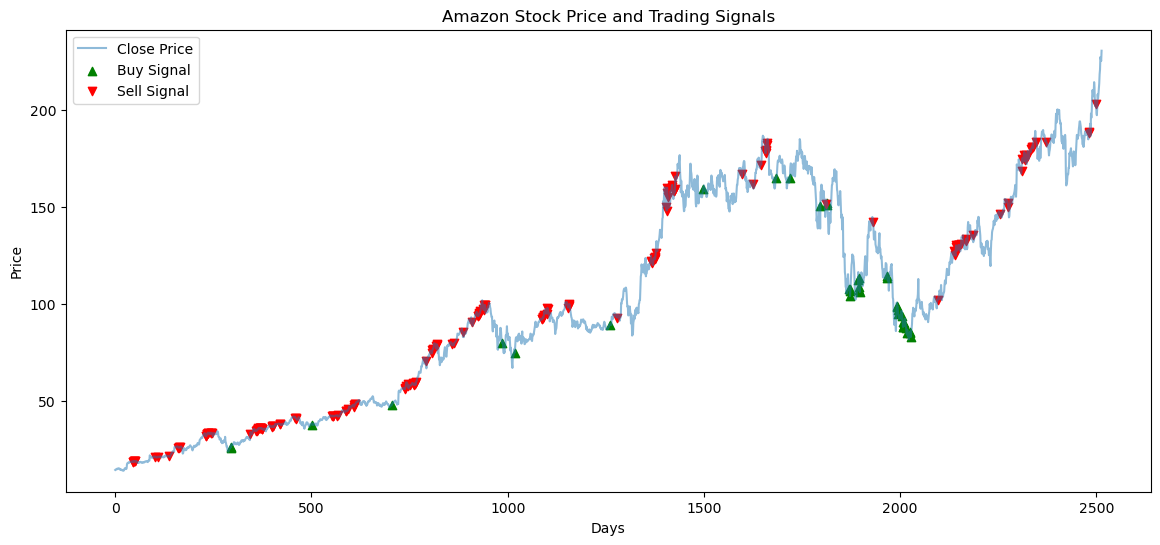

In [32]:
# Plot the stock price and signals
plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.scatter(data.index, data['Buy_Signal'], label='Buy Signal', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal'], label='Sell Signal', marker='v', color='red')
plt.title('Amazon Stock Price and Trading Signals')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()